# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
ds= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Dataset UAS.xlsx')

# Nomor 2, Drop tabel



*   **Menghapus Kolom Over 18 karena tidak relevan dan tidak berguna untuk prediksi**



In [ ]:
ds = ds.drop('Over18',axis=1)

*   **Check top 10 Data in Tabel**

In [ ]:
#disini kolom atribut over18 sudah tidak ada karena sudah dihilangkan
ds.head(10)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,Single,5993,19479,8,Yes,11,3,1,8,6
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,Married,5130,24907,1,No,23,4,4,10,10
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,Single,2090,2396,6,Yes,15,3,2,7,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,Married,2909,23159,1,Yes,11,3,3,8,8
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,Married,3468,16632,9,No,12,3,4,6,2
5,No,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,Single,3068,11864,0,No,13,3,3,8,7
6,No,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,Married,2670,9964,4,Yes,20,4,1,12,1
7,No,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,Divorced,2693,13335,1,No,22,4,2,1,1
8,No,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,Single,9526,8787,0,No,21,4,2,10,9
9,No,36,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,Married,5237,16577,6,No,13,3,2,17,7


# Data Preprocessing


*   **Check Missing Value**

In [ ]:
ds.isnull().sum()

Attrition                    0
Age                          0
BusinessTravel              55
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                  88
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
YearsAtCompany               0
dtype: int64

*   **Check Type Data**



In [ ]:
ds.dtypes

Attrition                    object
Age                           int64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                  float64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
TotalWorkingYears             int64
YearsAtCompany                int64
dtype: object

*   **Mengisi missing value atribut data training dengan type data angka/numerik menggunakan mean**

In [ ]:
import numpy as np
numeric_atr = ds.select_dtypes(include=np.number)
numeric_columns = numeric_atr.columns
ds[numeric_columns] = ds[numeric_columns].fillna(ds.mean())

<ipython-input-8-d575a8ebd940>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds[numeric_columns] = ds[numeric_columns].fillna(ds.mean())


In [ ]:
ds.isnull().sum()

Attrition                    0
Age                          0
BusinessTravel              55
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
YearsAtCompany               0
dtype: int64

*   **Mengisi missing value atribut data training dengan type data object menggunakan modulus**

In [ ]:
object_columns = ds.select_dtypes(include='object').columns.tolist() #menyimpan kolom bertipe object
object_columns.remove('Attrition') #membuang kolom 'class' supaya tidak di imputasi

In [ ]:
ds = ds.fillna(ds.mode().iloc[0])

In [ ]:
ds.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
YearsAtCompany              0
dtype: int64

In [ ]:
ds.head(20)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,Single,5993,19479,8,Yes,11,3,1,8,6
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,Married,5130,24907,1,No,23,4,4,10,10
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,Single,2090,2396,6,Yes,15,3,2,7,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,Married,2909,23159,1,Yes,11,3,3,8,8
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,Married,3468,16632,9,No,12,3,4,6,2
5,No,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,Single,3068,11864,0,No,13,3,3,8,7
6,No,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,Married,2670,9964,4,Yes,20,4,1,12,1
7,No,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,Divorced,2693,13335,1,No,22,4,2,1,1
8,No,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,Single,9526,8787,0,No,21,4,2,10,9
9,No,36,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,Married,5237,16577,6,No,13,3,2,17,7


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

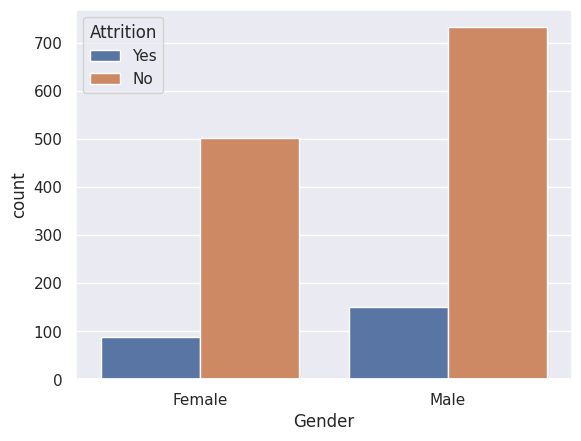

In [ ]:
import seaborn as sns
sns.set(style='darkgrid')
chart=sns.countplot(x='Gender', data=ds,hue='Attrition')
chart.set_xticklabels(['Female','Male'])



*   **Melakukan Label Encoding**



In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
#model pada decision tree di library scikit-learn tidak dapat menghandle fitur-fitur dengan tipe data string secara langsung
label_encoder = LabelEncoder()
for kolom in object_columns:
  ds[kolom] = label_encoder.fit_transform(ds[kolom])



*   **Melakukan Scaling**



In [ ]:
scaler = StandardScaler()
ds[numeric_columns] = scaler.fit_transform(ds[numeric_columns])

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

*   **Ekstraksi Feature dan Label**

In [ ]:
x = ds.drop('Attrition',axis = 1)
y = ds['Attrition']

x_train,x_tes,y_train,y_tes = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

*   **Mencari Max_depth optimal dengan cross validation**

In [ ]:
max_depth_values = [2,3,4, 5,6, 7,8, 9,10, 11]
model = DecisionTreeClassifier()
for depth in max_depth_values:
    model.max_depth = depth
    scores = cross_val_score(model, x, y, cv=10)
    mean_score = scores.mean()
    print(f"max_depth: {depth}, mean accuracy: {mean_score}")

max_depth: 2, mean accuracy: 0.8421768707482993
max_depth: 3, mean accuracy: 0.8421768707482993
max_depth: 4, mean accuracy: 0.8414965986394559
max_depth: 5, mean accuracy: 0.8285714285714286
max_depth: 6, mean accuracy: 0.8217687074829932
max_depth: 7, mean accuracy: 0.8149659863945578
max_depth: 8, mean accuracy: 0.8034013605442178
max_depth: 9, mean accuracy: 0.8054421768707483
max_depth: 10, mean accuracy: 0.7959183673469388
max_depth: 11, mean accuracy: 0.7877551020408164


*   **Inisiasi Model Decision Tree**

In [ ]:
model = DecisionTreeClassifier(criterion='gini',max_depth=11)
model.fit(x_train,y_train)

y_pred = model.predict(x_tes)

*   **Akurasi Decision Tree**

In [ ]:
print('Akurasi : ', accuracy_score(y_pred,y_tes))

Akurasi :  0.7789115646258503


*   **Inisiasi Model Decision Tree**

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

y_pred = model.predict(x_tes)

*   **Akurasi Decision Tree**

In [ ]:
print('Akurasi Tree:',accuracy_score(y_tes,y_pred))

Akurasi Tree: 0.8605442176870748


*   **Inisiasi Model Decision Tree**

In [ ]:
model = DecisionTreeClassifier(criterion='log_loss',max_depth=3)
model.fit(x_train,y_train)

y_pred = model.predict(x_tes)

*   **Akurasi Decision Tree**

In [ ]:
print('Akurasi : ', accuracy_score(y_pred,y_tes))

Akurasi :  0.8605442176870748


*   **Classification Report**

In [ ]:
print(classification_report(y_tes,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.98      0.92       247
         Yes       0.67      0.26      0.37        47

    accuracy                           0.86       294
   macro avg       0.77      0.62      0.65       294
weighted avg       0.84      0.86      0.83       294



*   **Confusion Matrix**

In [ ]:
print(confusion_matrix(y_tes,y_pred))

[[241   6]
 [ 35  12]]


*   **Gambar Decision Tree**

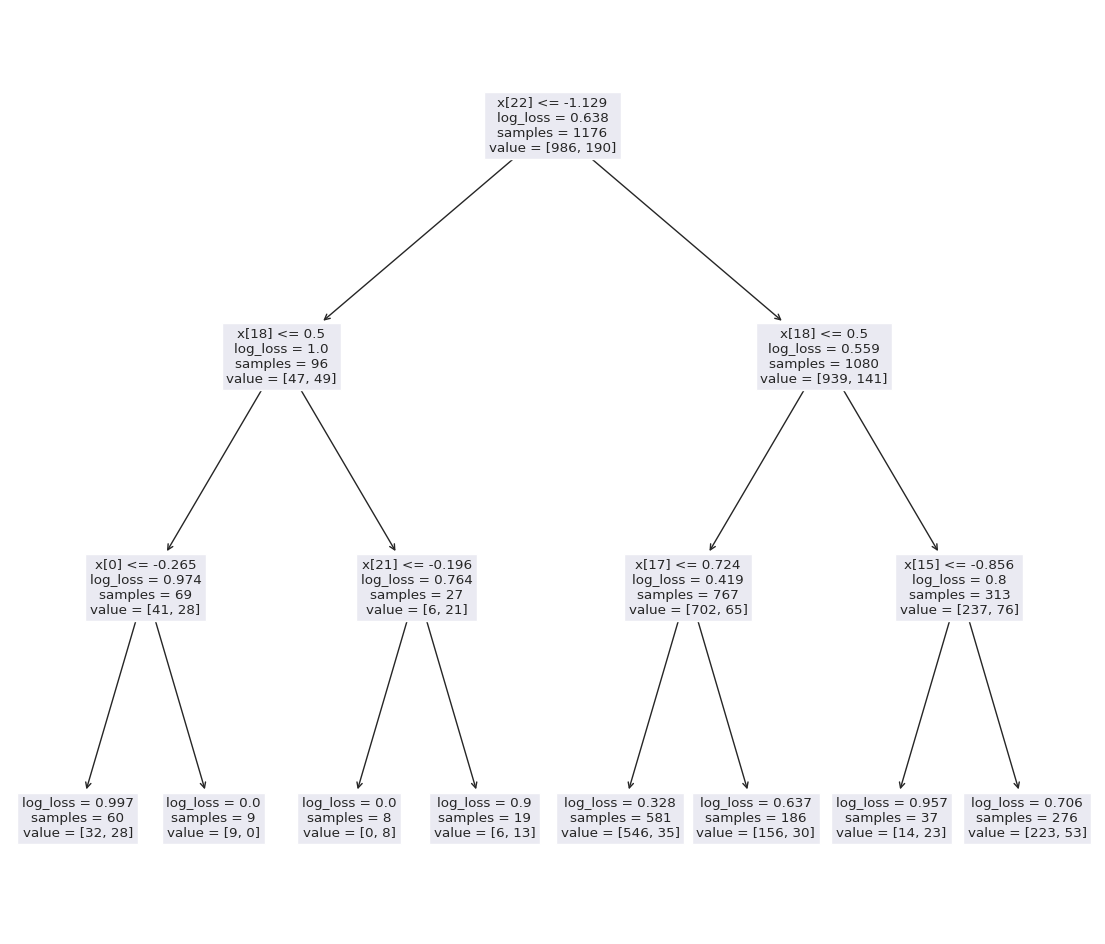

In [ ]:
#Menampilkan Gambar Decision Tree
fig = plt.figure(figsize=(14, 12))
plot_tree(model)
plt.show()